# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
/home/zzhang/OneDrive/code/qem/qem/image_fitting.py:1368: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


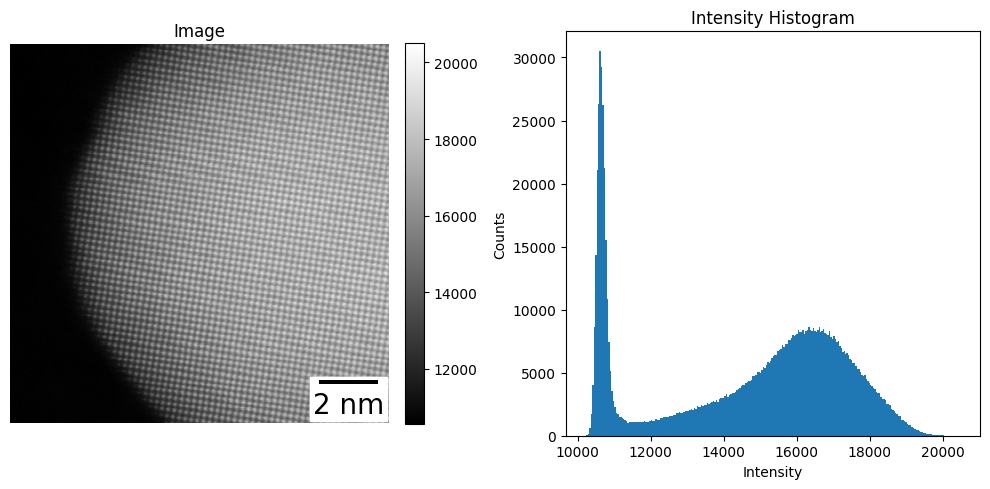

In [1]:
import matplotlib.pyplot as plt

import qem

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageFitting

model=ImageFitting(image, dx=dx, elements=['Au'])
model.import_coordinates(input_coordinates)
model.plot()

In [11]:
from math import e


model.fit_background = True
model.model_type = 'gaussian'
params = model.init_params()
# params = model.linear_estimator(params)
model.prediction = model.predict(params, local=True)
# model.fit_global(params, maxiter=1000, tol = 1e-6, verbose=True)
model.fit_stochastic(params, maxiter=50, tol =1e-3,batch_size=6000, num_epoch=10, verbose=0, step_size=0.05)


Fitting random batch: 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]
INFO:root:Convergence rate for pos_x = 2.396026611328125
INFO:root:Convergence not reached


{'pos_x': Array([ 151.50838,  155.25522,  153.24852, ..., 1023.     , 1021.5325 ,
         213.44987], dtype=float32),
 'pos_y': Array([ 436.30377,  406.41064,  536.03735, ..., 1004.5065 , 1017.83044,
         252.61557], dtype=float32),
 'height': Array([1416.0751, 1646.337 , 1659.522 , ..., 6598.7686, 4843.209 ,
        1684.1273], dtype=float32),
 'width': Array([5.826046], dtype=float32),
 'background': Array(10202.198, dtype=float32)}

/home/zzhang/OneDrive/code/qem/qem/image_fitting.py:1504: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


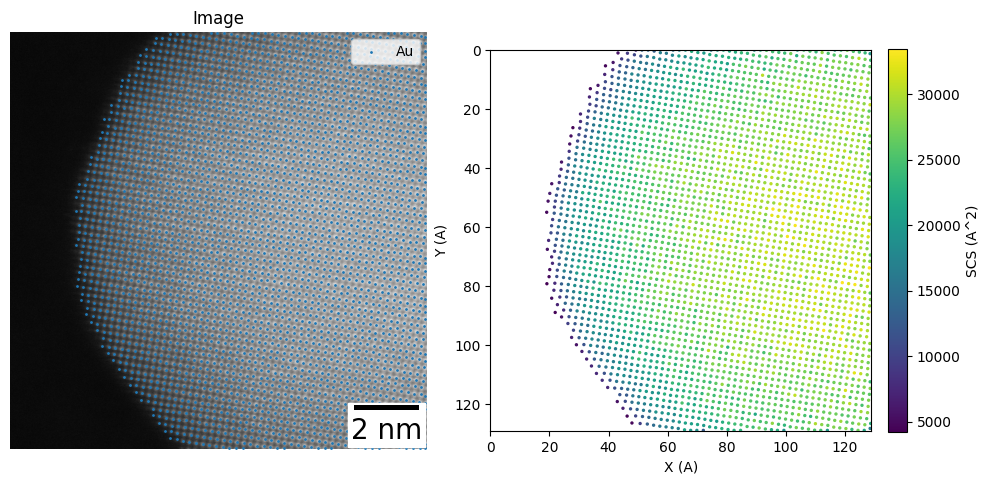

In [12]:
model.plot_scs()

/tmp/ipykernel_120266/234905274.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_120266/234905274.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_120266/234905274.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_120266/234905274.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_120266/234905274.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 1.0, 'Residuals')

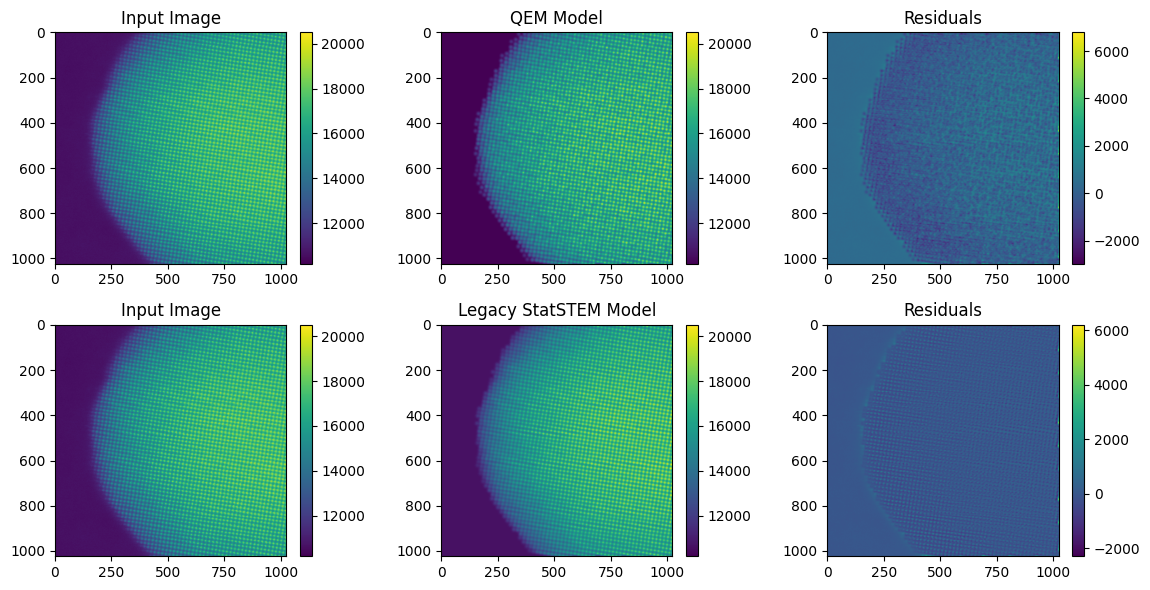

In [13]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.prediction)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.prediction
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')